In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

In [ ]:
# Install PyTorch
!pip install torch==1.12.0 torchvision --extra-index-url https://download.pytorch.org/whl/cu113
# Install MMCV
!pip install openmim
!mim install mmcv-full==1.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

import matplotlib.pyplot as plt

In [ ]:
!mkdir checkpoints

In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Might need to modify these paths, placed in our shared Autonomous Driving directory in side segformer directory
config_file = '/content/gdrive/MyDrive/Autonomous Driving/segformer/my_config.py'
checkpoint_file = '/content/gdrive/MyDrive/Autonomous Driving/segformer/segformer_checkpoint.pth'
classes = ('nonroad', 'road', 'obstacles')
palette = [[255, 0, 0], [0, 255, 0], [0, 0, 255]]

In [ ]:
import mmcv
from mmseg.models import build_segmentor
from mmcv.runner import load_checkpoint

# build the model from a config file and a checkpoint file
config = mmcv.Config.fromfile(config_file)
config.model.pretrained = None
config.model.train_cfg = Nonemodel = build_segmentor(config.model, test_cfg=config.get('test_cfg'))
model = build_segmentor(config.model, test_cfg=config.get('test_cfg'))
checkpoint = load_checkpoint(model, checkpoint_file, map_location='cpu')
model.CLASSES = classes
model.PALETTE = palette
model.cfg = config  # save the config in the model for convenience
model.to('cuda:0')
model.eval()

<Figure size 576x432 with 0 Axes>

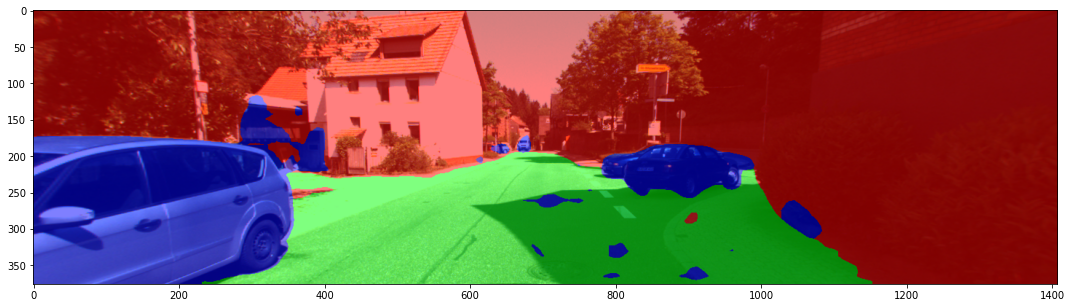

In [ ]:
# test a single image from the dataset, might have to modify path
img = mmcv.imread('/content/gdrive/MyDrive/mobilenet/k360/test/2/6_0000009492.png')

result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)
result = inference_segmentor(model, img)